# Summary

An image classification project was conducted using images of cats and dogs. A Convolutional Neural Network (CNN) utilizing Keras/Tensorflow was trained and tested on a total of 10,000 images.

The CNN reached an accuracy of 80% on the validation set

# Data preprocessing

In [1]:
#Import in the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#Setting the initial image size and batch size
size=128
batch=32
pth = 'cat_dog'

In [3]:
#Applying augmentations on training set so that we avoid overfitting and feature scaling the images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#Point it to the training images
train_set = train_datagen.flow_from_directory(
        pth+'/training_set',
        target_size=(size, size),
        batch_size=batch,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [4]:
#Feature scale the test data
test_datagen = ImageDataGenerator(rescale=1./255)

#Point it to the test images
test_set = test_datagen.flow_from_directory(
        pth+'/test_set',
        target_size=(size, size),
        batch_size=batch,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [5]:
#An index of 0 is a cat and an index of 1 is a dog
train_set.class_indices

{'cats': 0, 'dogs': 1}

# Building the model

In [6]:
def Create_CNN(neurons, size):
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(size,size,3)))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Flatten())
    for i in neurons:
        cnn.add(tf.keras.layers.Dense(units=i, activation='relu'))
    cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    return cnn

# Training the model

In [7]:
#Compiling the CNN
#Create the CNN architecture with 1 layer of 50 nodes
cnn = Create_CNN([50], size)
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
%%time
#Training the CNN on the training set and evaluating it vs the test set
results = cnn.fit(x=train_set, validation_data=test_set, epochs=10)

Epoch 1/10
250/250 [==============================] - 123s 488ms/step - loss: 0.7577 - accuracy: 0.5520 - val_loss: 0.6605 - val_accuracy: 0.6475
Epoch 2/10
250/250 [==============================] - 97s 390ms/step - loss: 0.6413 - accuracy: 0.6371 - val_loss: 0.5593 - val_accuracy: 0.7150
Epoch 3/10
250/250 [==============================] - 97s 389ms/step - loss: 0.5756 - accuracy: 0.7038 - val_loss: 0.5234 - val_accuracy: 0.7340
Epoch 4/10
250/250 [==============================] - 98s 391ms/step - loss: 0.5447 - accuracy: 0.7197 - val_loss: 0.4976 - val_accuracy: 0.7610
Epoch 5/10
250/250 [==============================] - 99s 396ms/step - loss: 0.4990 - accuracy: 0.7497 - val_loss: 0.4631 - val_accuracy: 0.7790
Epoch 6/10
250/250 [==============================] - 98s 391ms/step - loss: 0.4602 - accuracy: 0.7839 - val_loss: 0.4906 - val_accuracy: 0.7695
Epoch 7/10
250/250 [==============================] - 98s 390ms/step - loss: 0.4365 - accuracy: 0.8003 - val_loss: 0.4510 - val_a

# Evaluating the model

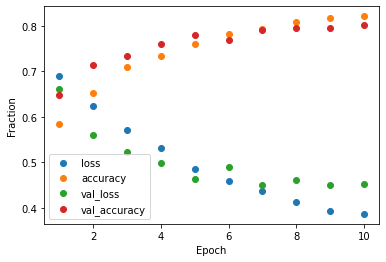

In [10]:
#Plotting the accuracies and losses over time
for key in results.history:
    plt.scatter(x=[x for x in range(1,len(results.history[key])+1)],y=[results.history[key]], label=key)
plt.xlabel('Epoch')
plt.ylabel('Fraction')
plt.legend()

In [20]:
#Making a single prediction
#The CNN correctly predicts that the image is a dog

from keras.preprocessing import image

#Load the single image that we want to test
test_image = image.load_img(pth+'/single_prediction/cat_or_dog_1.jpg', target_size=(size,size))

#Convert the test image into an array
test_image = image.img_to_array(test_image)
#print ()

#Since our predict was based on a batch size of 8, we need to add in empty rows so that it can process it as a 8 batch
#but with only one real image
test_image = np.expand_dims(test_image, axis=0)

#Prediction (1 = dog, 0 = cat)
result = cnn.predict(test_image)
train_set.class_indices
if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print (prediction)

dog
